<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/diabetes_randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
import urllib.request

In [2]:
# Download dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
filename = "pima-indians-diabetes.csv"
urllib.request.urlretrieve(url, filename)

('pima-indians-diabetes.csv', <http.client.HTTPMessage at 0x7ae776ddd930>)

In [3]:
# Load dataset
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(filename, names=column_names)

In [4]:
# Exploratory Data Analysis (EDA)
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()
print("\nMissing Values:\n", data.isnull().sum())

Dataset Head:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1 

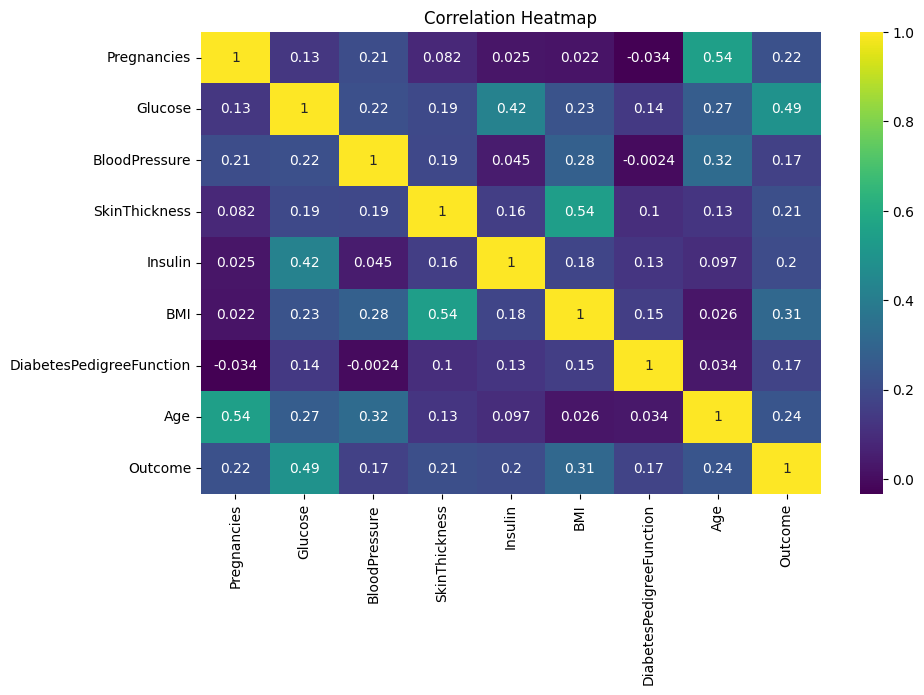

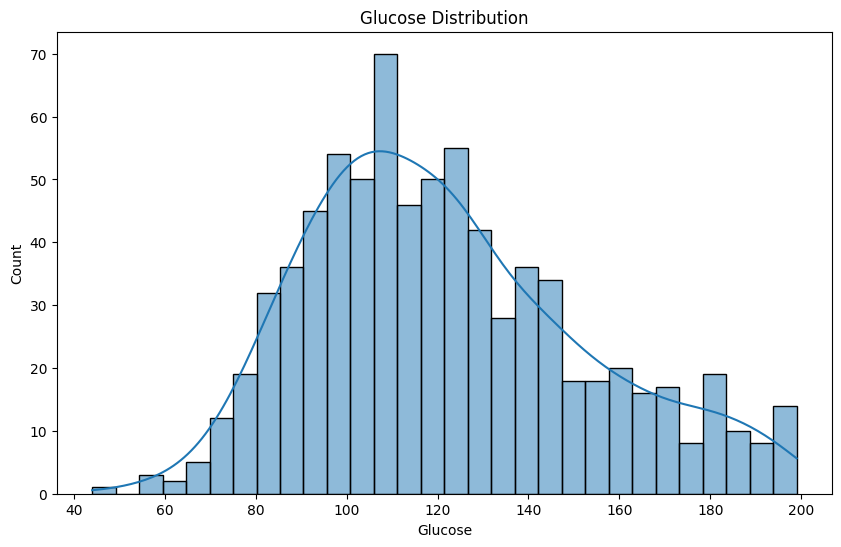

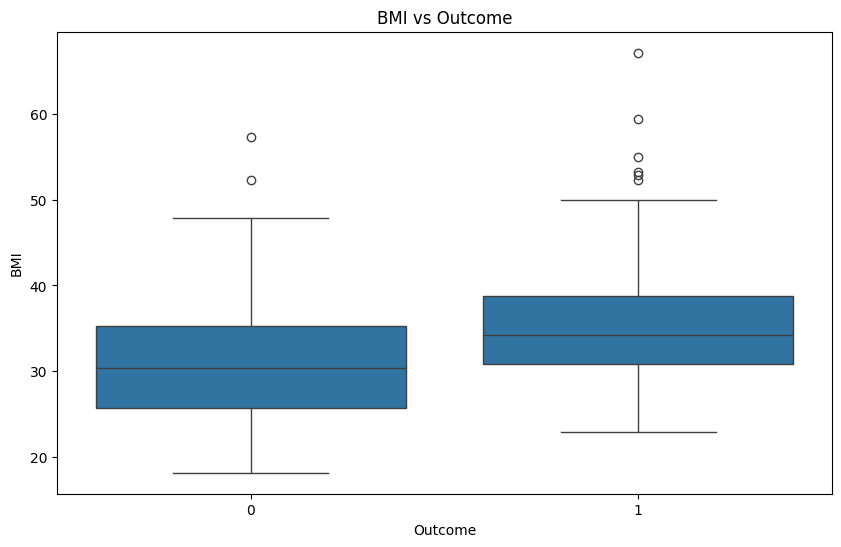

In [13]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Glucose'], kde=True, bins=30)
plt.title("Glucose Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.title("BMI vs Outcome")
plt.show()

In [6]:
# Pre-Processing
# Replace zero values in certain columns with NaN to handle missing data
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for column in columns_with_zeros:
    data[column] = data[column].replace(0, np.nan)

# Fill missing values with the median of each column
data.fillna(data.median(), inplace=True)

In [7]:
# Feature and Target Selection
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Feature Selection
# Select the top 5 features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support(indices=True)]
print("\nSelected Features:", selected_features)


Selected Features: Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age'], dtype='object')


In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Model Training using RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

In [10]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7402597402597403

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

